<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/ML_A_Z/regression/support_vector_regression_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/ML_A_Z/Part_2_Regression/Section_7_Support_Vector_Regression_SVR/Python/Position_Salaries.csv'

In [4]:
df = pd.read_csv(path)
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [6]:
df.shape

(10, 3)

In [7]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Feature scaling

In [11]:
# lets change the structure of y
df.iloc[:,1:].values

array([[      1,   45000],
       [      2,   50000],
       [      3,   60000],
       [      4,   80000],
       [      5,  110000],
       [      6,  150000],
       [      7,  200000],
       [      8,  300000],
       [      9,  500000],
       [     10, 1000000]])

In [13]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [15]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_scaled = sc_x.fit_transform(X)
X_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [20]:
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y)
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [27]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_scaled,y_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [30]:
scaled_result = svr.predict(sc_x.transform([[6.5]]))
scaled_result

array([-0.27861589])

In [31]:
sc_y.inverse_transform(scaled_result.reshape(-1,1))

array([[170370.0204065]])

Text(0.5, 1.0, 'Salary Level Graph (SVR Regression)')

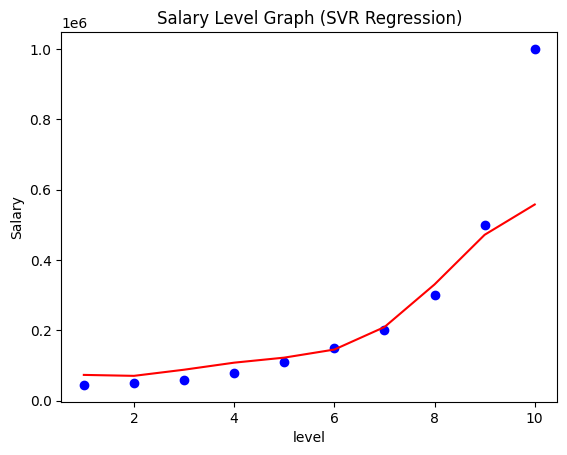

In [35]:
%matplotlib inline

plt.scatter(df.Level,df.Salary,color="blue")
plt.plot(df.Level,sc_y.inverse_transform(svr.predict(sc_x.transform(X)).reshape(-1,1)),color="red")
plt.xlabel("level")
plt.ylabel("Salary")
plt.title("Salary Level Graph (SVR Regression)")

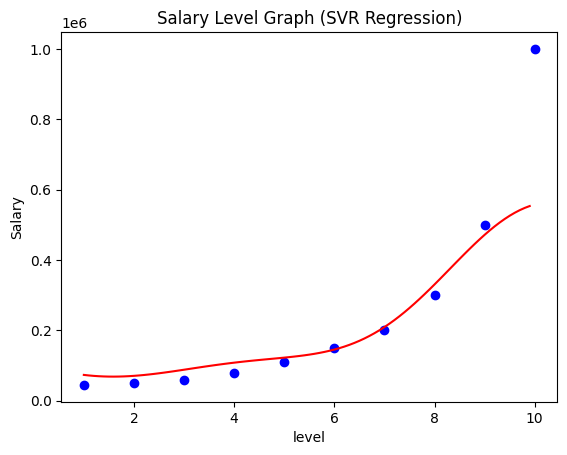

In [44]:
%matplotlib inline
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)


plt.scatter(X,y,color="blue")
plt.plot(X_grid,sc_y.inverse_transform(svr.predict(sc_x.transform(X_grid)).reshape(-1,1)),color="red")
plt.xlabel("level")
plt.ylabel("Salary")
plt.title("Salary Level Graph (SVR Regression)")
plt.show()